In [184]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
#from statsmodels.tsa.stattools import adfuller, kpss
#from statsmodels.tsa.stattools import acf, pacf
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_validate
from sklearn.svm import LinearSVR, SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [199]:
gold = pd.read_csv('ouro2.csv', index_col='Data', parse_dates=['Data'])
gold.columns = ['today_price']

# inverte dataframe para poder fazer as médias móveis com os valores corretos
gold = gold.reindex(index=gold.index[::-1])

#Variação do preço do ouro
# gold['next_week_price'] = gold.today_price.shift(1)
# gold['last_week_price'] = gold.today_price.shift(-1)
# gold['delta'] = gold.today_price - gold.last_week_price
# #gold['s3'] = gold.delta.rolling(window=3).mean()
# #gold['s10'] = gold.delta.rolling(window=10).mean()
# gold['m3'] = gold.today_price.rolling(window=3).mean()
# gold['m5'] = gold.today_price.rolling(window=5).mean()
# gold['m7'] = gold.today_price.rolling(window=7).mean()
# gold['m9'] = gold.today_price.rolling(window=9).mean()
# # gold['m12'] = gold.today_price.rolling(window=12).mean()
# # gold['m14'] = gold.today_price.rolling(window=14).mean()
# # gold['m17'] = gold.today_price.rolling(window=17).mean()
# # gold['m21'] = gold.today_price.rolling(window=21).mean()
# # gold['m28'] = gold.today_price.rolling(window=28).mean()
# gold.dropna(inplace=True)
# print("Número de linhas: {}\nNúmero de colunas: {}".format(gold.shape[0], gold.shape[1]))
# gold.head()

#gold['data']= pd.to_datetime(gold.data, dayfirst=True) #transform data into datetime

gold['last_week_price'] = gold.today_price.shift(1)
filtro = np.where(gold['today_price'] > gold['last_week_price'], 1, 0)
gold['target_subida'] = filtro
gold['next_week_price'] = gold.today_price.shift(-1)
gold['delta1'] = gold.today_price - gold.last_week_price
gold['delta2'] = gold.next_week_price - gold.today_price
gold['m3'] = gold.today_price.rolling(window=3).mean()
gold['m5'] = gold.today_price.rolling(window=5).mean()
gold['m7'] = gold.today_price.rolling(window=7).mean()
gold['m9'] = gold.today_price.rolling(window=9).mean()
gold['m12'] = gold.today_price.rolling(window=12).mean()
gold['m15'] = gold.today_price.rolling(window=15).mean()
gold['m18'] = gold.today_price.rolling(window=18).mean()
gold['m21'] = gold.today_price.rolling(window=21).mean()
gold['m27'] = gold.today_price.rolling(window=27).mean()
gold['m35'] = gold.today_price.rolling(window=35).mean()
#gold.dropna(inplace=True)
gold.head(20)



,today_price,last_week_price,target_subida,next_week_price,delta1,delta2,m3,m5,m7,m9,m12,m15,m18,m21,m27,m35
Data,,,,,,,,,,,,,,,,
2000-06-18,282.7,NaN,0,290.1,NaN,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-06-25,290.1,282.7,1,283.2,7.4,-6.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-07,283.2,290.1,0,281.1,-6.9,-2.1,285.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-09-07,281.1,283.2,0,280.1,-2.1,-1.0,284.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-07-16,280.1,281.1,0,277.7,-1.0,-2.4,281.466667,283.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-07-23,277.7,280.1,0,272.6,-2.4,-5.1,279.633333,282.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-07-30,272.6,277.7,0,275.1,-5.1,2.5,276.800000,278.94,281.071429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-06-08,275.1,272.6,1,276.8,2.5,1.7,275.133333,277.32,279.985714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-08-13,276.8,275.1,1,274.1,1.7,-2.7,274.833333,276.46,278.085714,279.933333,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
gold.tail()

,today_price,last_week_price,target_subida,next_week_price,delta1,delta2,m3,m5,m7,m9,m12,m15,m18,m21,m27,m35
Data,,,,,,,,,,,,,,,,
2021-05-16,1878.9,1840.0,1,1905.3,38.9,26.4,1850.800000,1820.42,1804.442857,1788.655556,1772.650000,1774.406667,1786.300000,1797.314286,1811.951852,1837.594286
2021-05-23,1905.3,1878.9,1,1892.0,26.4,-13.3,1874.733333,1845.50,1827.085714,1807.411111,1789.441667,1779.553333,1788.550000,1797.290476,1812.585185,1838.180000
2021-05-30,1892.0,1905.3,0,1879.6,-13.3,-12.4,1892.066667,1869.94,1842.771429,1825.377778,1803.416667,1786.873333,1790.622222,1799.509524,1816.085185,1837.191429
2021-06-06,1879.6,1892.0,0,1868.0,-12.4,-11.6,1892.300000,1879.16,1857.014286,1840.133333,1814.566667,1796.580000,1794.055556,1801.442857,1817.218519,1835.242857
2021-06-13,1868.0,1879.6,0,NaN,-11.6,NaN,1879.866667,1884.76,1871.042857,1849.666667,1825.525000,1807.526667,1796.272222,1801.595238,1817.770370,1833.520000


### Normal series

<AxesSubplot:xlabel='today_price', ylabel='Count'>

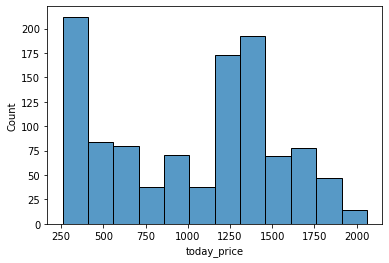

In [201]:
sns.histplot(gold.today_price)

<AxesSubplot:xlabel='Data', ylabel='today_price'>

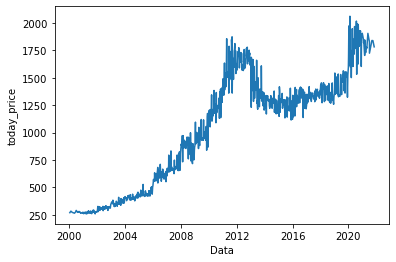

In [202]:
#print timeline graph
sns.lineplot(x=gold.index, y=gold.today_price)
#sns.lineplot(x=gold.data,y=gold.m7)
#sns.lineplot(x=gold.data,y=gold.m14)
#sns.lineplot(x=gold.data,y=gold.m21)

## Conjunto de treinamento

In [203]:
# Consideramos como teste as 100 semanas mais recentes
y_test = gold.next_week_price.tail(100) 
print('Conjunto y de teste')
print("Número de linhas: {}".format(y_test.shape[0]))
y_test.head()

Conjunto y de teste
Número de linhas: 100


Data
2019-07-21    1485.3
2019-07-28    1534.5
2019-04-08    1549.2
2019-11-08    1563.5
2019-08-18    1557.2
Name: next_week_price, dtype: float64

In [204]:
y_train = gold.next_week_price.head(-100)
print('Conjunto y de treino')
print("Número de linhas: {}".format(y_train.shape[0]))
y_train.head()

Conjunto y de treino
Número de linhas: 996


Data
2000-06-18    290.1
2000-06-25    283.2
2000-02-07    281.1
2000-09-07    280.1
2000-07-16    277.7
Name: next_week_price, dtype: float64

## Baseline

In [205]:
baseline = gold.tail(100).query('delta1 > 0')
acertos_bl = baseline.shape[0]
print("Subidas: {}".format(acertos_bl))

Subidas: 58


# Com delta

### Definindo os conjuntos de entrada para treino e teste

In [206]:
X_test = gold.filter(['today_price','m3','m15','m21'],axis=1).tail(100)
print('Conjunto X de teste')
print("Número de linhas: {}\nNúmero de colunas: {}".format(X_test.shape[0], X_test.shape[1]))
X_test.head()

Conjunto X de teste
Número de linhas: 100
Número de colunas: 4


,today_price,m3,m15,m21
Data,,,,
2019-07-21,1460.4,1458.933333,1386.233333,1377.114286
2019-07-28,1485.3,1470.400000,1396.793333,1383.152381
2019-04-08,1534.5,1493.400000,1409.813333,1391.433333
2019-11-08,1549.2,1523.000000,1424.313333,1400.000000
2019-08-18,1563.5,1549.066667,1439.400000,1410.357143


In [207]:
X_train = gold.filter(['today_price','m3','m15','m21'],axis=1).head(-100)
print('Conjunto X de treino')
print("Número de linhas: {}\nNúmero de colunas: {}".format(X_train.shape[0], X_train.shape[1]))
X_train.head()

Conjunto X de treino
Número de linhas: 996
Número de colunas: 4


,today_price,m3,m15,m21
Data,,,,
2000-06-18,282.7,NaN,NaN,NaN
2000-06-25,290.1,NaN,NaN,NaN
2000-02-07,283.2,285.333333,NaN,NaN
2000-09-07,281.1,284.800000,NaN,NaN
2000-07-16,280.1,281.466667,NaN,NaN


## Linear Regressor

In [148]:
linear = LinearRegression().fit(X_train, y_train)
print("Linear Regression model")
print("Gold Week Price (y) = %.2f * Delta (x1) \
+ %.2f * 7 Days Moving Average (x2) \
+ %.2f * 15 Days Moving Average (x3) \
+ %.2f * 21 Days Moving Average (x4) \
+ %.2f (constant)" % (linear.coef_[0], linear.coef_[1], linear.coef_[2], linear.coef_[3], linear.intercept_))

Linear Regression model
Gold Week Price (y) = 1.03 * Delta (x1) + -0.07 * 7 Days Moving Average (x2) + 0.02 * 15 Days Moving Average (x3) + 0.01 * 21 Days Moving Average (x4) + 3.63 (constant)


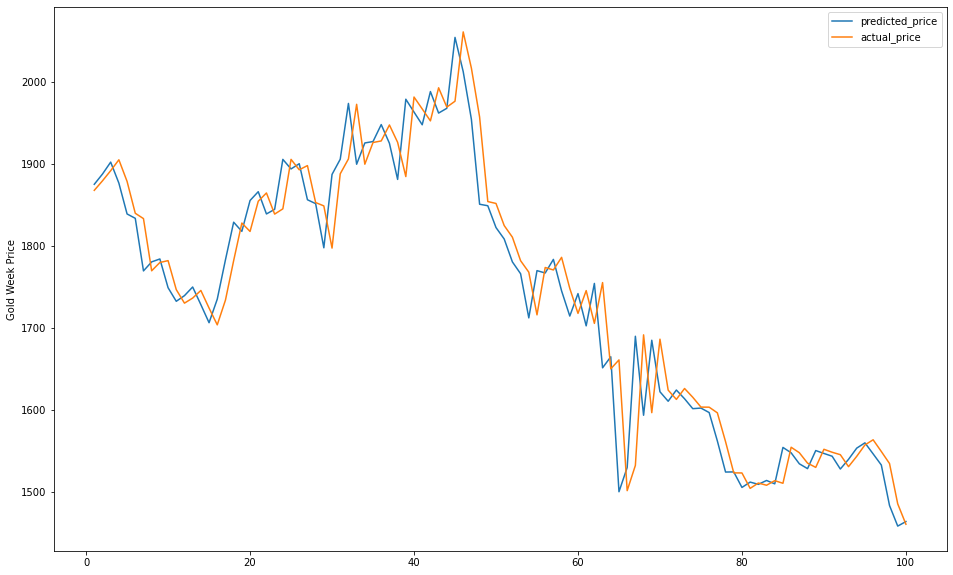

RMSE: 1938.4159430763073


In [149]:
predicted_price = linear.predict(X_test)
d = {'actual_price': y_test,'predicted_price': predicted_price}
df = pd.DataFrame(data=d)
df['actual_var'] = df.actual_price.shift(1) - df.actual_price
df['actual_var_sign'] = np.sign(df.actual_var)
df['predicted_var'] = df.predicted_price.shift(1) - df.predicted_price
df['predicted_var_sign'] = df.predicted_var/abs(df.predicted_var)
df['correct_prediction'] = np.equal(df.actual_var_sign, df.predicted_var_sign)
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(16, 10))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold Week Price")
plt.show()
rmse = mean_squared_error(y_test, predicted_price)
print("RMSE:", rmse)

In [150]:
df

,actual_price,predicted_price,actual_var,actual_var_sign,predicted_var,predicted_var_sign,correct_prediction
100,1460.4,1463.652277,NaN,NaN,NaN,NaN,False
99,1485.3,1458.142377,-24.9,-1.0,5.509900,1.0,False
98,1534.5,1483.276961,-49.2,-1.0,-25.134584,-1.0,True
97,1549.2,1532.687886,-14.7,-1.0,-49.410925,-1.0,True
96,1563.5,1546.297627,-14.3,-1.0,-13.609741,-1.0,True
...,...,...,...,...,...,...,...
5,1878.9,1839.159951,-38.9,-1.0,-5.306149,-1.0,True
4,1905.3,1876.800945,-26.4,-1.0,-37.640994,-1.0,True
3,1892.0,1902.455938,13.3,1.0,-25.654993,-1.0,False
2,1879.6,1887.875085,12.4,1.0,14.580853,1.0,True


In [151]:
df.head(30)
print("Número de linhas: {}".format(df.shape[0]))

Número de linhas: 100


In [152]:
r2_score = linear.score(X_test, y_test)*100
float("{0:.2f}".format(r2_score))

92.2

In [153]:
res = df.query('correct_prediction == True')
acertos = res.shape[0]
print("Acertos: {}".format(acertos))

Acertos: 47


## Ridge

In [154]:
alpha_list = 10**(np.random.uniform(-3, 3, 50))
final_r2 = np.NINF
for alpha_value in alpha_list:
    ridge = Ridge(alpha=alpha_value).fit(X_train, y_train)
    predicted_price = ridge.predict(X_test)
    r2_score = ridge.score(X_test, y_test)
    if r2_score > final_r2:
        final_r2 = r2_score
        final_alpha = alpha_value
        final_coef0 = ridge.coef_[0]
        final_coef1 = ridge.coef_[1]
        final_coef2 = ridge.coef_[2]
        final_coef3 = ridge.coef_[3]
        final_intercept = ridge.intercept_
print("Resultado da busca por hiperparâmetros:")
print("Melhor R2 = {}".format(final_r2))
print("Melhor alpha = {}".format(final_alpha))
print("Linear Regression model with Ridge (l2) regularization")
print("Gold Week Price (y) = %.2f * Delta (x1) \
+ %.2f * 3 Days Moving Average (x2) \
+ %.2f * 9 Days Moving Average (x3) \
+ %.2f * 35 Days Moving Average (x4) \
+ %.2f (constant)" % (final_coef0, final_coef1, final_coef2, final_coef3, final_intercept))

Resultado da busca por hiperparâmetros:
Melhor R2 = 0.9220801179051418
Melhor alpha = 979.4640656412228
Linear Regression model with Ridge (l2) regularization
Gold Week Price (y) = 1.02 * Delta (x1) + -0.06 * 3 Days Moving Average (x2) + 0.02 * 9 Days Moving Average (x3) + 0.01 * 35 Days Moving Average (x4) + 3.64 (constant)


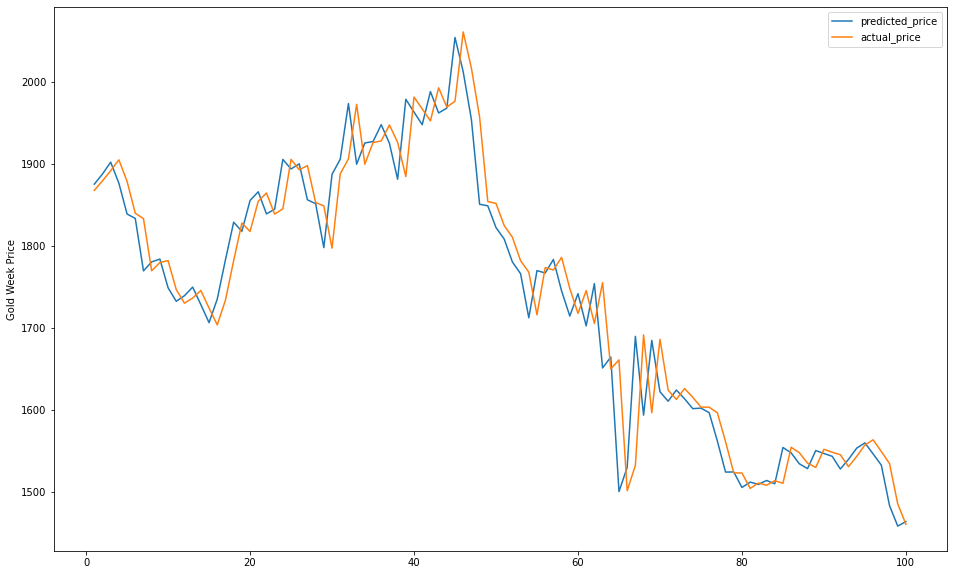

RMSE: 1936.9490996052407


In [155]:
ridge = Ridge(alpha=final_alpha).fit(X_train, y_train)
predicted_price = ridge.predict(X_test)
d = {'actual_price': y_test,'predicted_price': predicted_price}
df = pd.DataFrame(data=d)
df['actual_var'] = df.actual_price.shift(-1) - df.actual_price
df['actual_var_sign'] = np.sign(df.actual_var)
df['predicted_var'] = df.predicted_price.shift(1) - df.predicted_price
df['predicted_var_sign'] = df.predicted_var/abs(df.predicted_var)
df['correct_prediction'] = np.equal(df.actual_var_sign, df.predicted_var_sign)
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(16, 10))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold Week Price")
plt.show()
rmse = mean_squared_error(y_test, predicted_price)
print("RMSE:", rmse)

In [156]:
df.head(30)
print("Número de linhas: {}".format(df.shape[0]))

Número de linhas: 100


In [157]:
r2_score = ridge.score(X_test, y_test)*100
float("{0:.2f}".format(r2_score))

92.21

In [158]:
res = df.query('correct_prediction == True')
acertos = res.shape[0]
print("Acertos: {}".format(acertos))

Acertos: 49


## Lasso

In [159]:
alpha_list = 10**(np.random.uniform(-3, 3, 50))
final_r2 = np.NINF
for alpha_value in alpha_list:
    lasso = Lasso(alpha=alpha_value, max_iter=10000).fit(X_train, y_train)
    predicted_price = lasso.predict(X_test)
    r2_score = lasso.score(X_test, y_test)
    if r2_score > final_r2:
        final_r2 = r2_score
        final_alpha = alpha_value
        final_coef0 = lasso.coef_[0]
        final_coef1 = lasso.coef_[1]
        final_coef2 = lasso.coef_[2]
        final_coef3 = lasso.coef_[3]
        final_intercept = lasso.intercept_
print("Resultado da busca por hiperparâmetros:")
print("Melhor R2 = {}".format(final_r2))
print("Melhor alpha = {}".format(final_alpha))
print("Lasso (l1) regularization")
print("Gold Week Price (y) = %.2f * Delta (x1) \
+ %.2f * 3 Days Moving Average (x2) \
+ %.2f * 9 Days Moving Average (x3) \
+ %.2f * 35 Days Moving Average (x4) \
+ %.2f (constant)" % (final_coef0, final_coef1, final_coef2, final_coef3, final_intercept))

Resultado da busca por hiperparâmetros:
Melhor R2 = 0.9230043402706954
Melhor alpha = 8.77898517750563
Lasso (l1) regularization
Gold Week Price (y) = 0.97 * Delta (x1) + -0.00 * 3 Days Moving Average (x2) + 0.02 * 9 Days Moving Average (x3) + 0.01 * 35 Days Moving Average (x4) + 3.61 (constant)


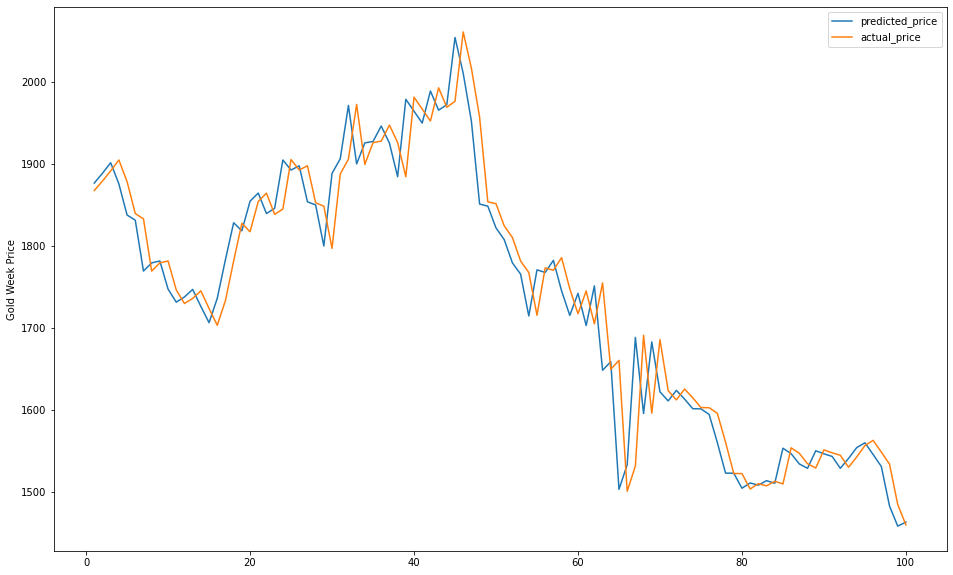

RMSE: 1913.9745823104768


In [160]:
lasso = Lasso(alpha=final_alpha, max_iter=10000).fit(X_train, y_train)
predicted_price = lasso.predict(X_test)
d = {'actual_price': y_test,'predicted_price': predicted_price}
df = pd.DataFrame(data=d)
df['actual_var'] = df.actual_price.shift(-1) - df.actual_price
df['actual_var_sign'] = np.sign(df.actual_var)
df['predicted_var'] = df.predicted_price.shift(1) - df.predicted_price
df['predicted_var_sign'] = df.predicted_var/abs(df.predicted_var)
df['correct_prediction'] = np.equal(df.actual_var_sign, df.predicted_var_sign)
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(16, 10))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold Week Price")
plt.show()
rmse = mean_squared_error(y_test, predicted_price)
print("RMSE:", rmse)

In [161]:
df.head(30)
print("Número de linhas: {}".format(df.shape[0]))

Número de linhas: 100


In [162]:
r2_score = lasso.score(X_test, y_test)*100
float("{0:.2f}".format(r2_score))

92.3

In [163]:
res = df.query('correct_prediction == True')
acertos = res.shape[0]
print("Acertos: {}".format(acertos))

Acertos: 47


## Random Forest Regressor

In [164]:
n_estimators_list = [25, 50, 75]
final_r2 = np.NINF
for n_estimators_value in n_estimators_list:
    rf = RandomForestRegressor(n_estimators=n_estimators_value, max_features=2).fit(X_train, y_train)
    predicted_price = rf.predict(X_test)
    r2_score = rf.score(X_test, y_test)
    if r2_score > final_r2:
        final_r2 = r2_score
        final_n_estimators = n_estimators_value    
print("Melhor R2 = {}".format(final_r2))
print("Valor de estimadores = {}".format(final_n_estimators))

Melhor R2 = 0.16459053254819866
Valor de estimadores = 50


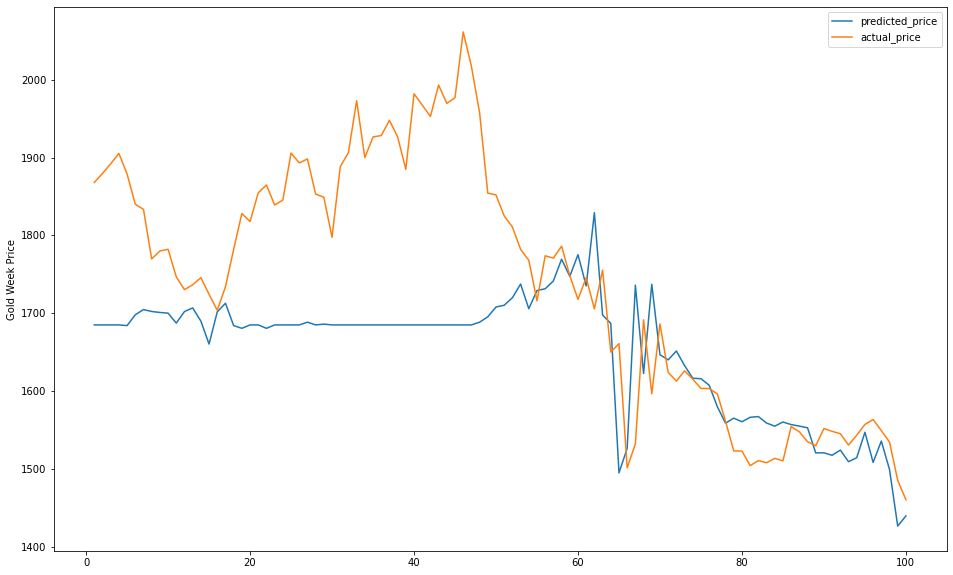

RMSE: 21891.354457280013


In [165]:
rf = RandomForestRegressor(n_estimators=final_n_estimators).fit(X_train, y_train)
predicted_price = rf.predict(X_test)
d = {'actual_price': y_test,'predicted_price': predicted_price}
df = pd.DataFrame(data=d)
df['actual_var'] = df.actual_price.shift(-1) - df.actual_price
df['actual_var_sign'] = np.sign(df.actual_var)
df['predicted_var'] = df.predicted_price.shift(1) - df.predicted_price
df['predicted_var_sign'] = df.predicted_var/abs(df.predicted_var)
df['correct_prediction'] = np.equal(df.actual_var_sign, df.predicted_var_sign)
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(16, 10))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold Week Price")
plt.show()

rmse = mean_squared_error(y_test, predicted_price)
print("RMSE:", rmse)

In [166]:
df.head(30)
print("Número de linhas: {}".format(df.shape[0]))

Número de linhas: 100


In [167]:
r2_score = rf.score(X_test, y_test)*100
float("{0:.2f}".format(r2_score))

11.94

In [168]:
res = df.query('correct_prediction == True')
acertos = res.shape[0]
print("Acertos: {}".format(acertos))

Acertos: 45


## Linear SVM Regressor

In [169]:
epsilon_list = [0.1, 0.3]
C_list = 2**(np.random.uniform(-5, 15, 10))
final_r2 = np.NINF
for C_value in C_list:
    epsilon_value = random.choice(epsilon_list)
    lsvmr = LinearSVR(epsilon = epsilon_value, C = C_value, max_iter = 10000).fit(X_train, y_train)
    predicted_price = lsvmr.predict(X_test)
    r2_score = lsvmr.score(X_test, y_test)
    if r2_score > final_r2:
        final_r2 = r2_score
        final_epsilon = epsilon_value
        final_C = C_value
        final_coef0 = lsvmr.coef_[0]
        final_coef1 = lsvmr.coef_[1]
        final_coef2 = lsvmr.coef_[2]
        final_coef3 = lsvmr.coef_[3]
        final_intercept = lsvmr.intercept_
print("Resultado da busca por hiperparâmetros:")
print("Melhor R2 = {}".format(final_r2))
print("Valor do epsilon = {}".format(final_epsilon))
print("Valor do C = {}".format(final_C))
print("Linear SVM Regressor model")
print("Gold Week Price (y) = %.2f * Delta (x1) \
+ %.2f * 3 Days Moving Average (x2) \
+ %.2f * 5 Days Moving Average (x3) \
+ %.2f * 7 Days Moving Average (x4) \
+ %.2f (constant)" % (final_coef0, final_coef1, final_coef2, final_coef3, final_intercept))

Resultado da busca por hiperparâmetros:
Melhor R2 = 0.9198423223691271
Valor do epsilon = 0.1
Valor do C = 2.3531004871579135
Linear SVM Regressor model
Gold Week Price (y) = 0.99 * Delta (x1) + -0.03 * 3 Days Moving Average (x2) + 0.05 * 5 Days Moving Average (x3) + -0.00 * 7 Days Moving Average (x4) + 1.17 (constant)


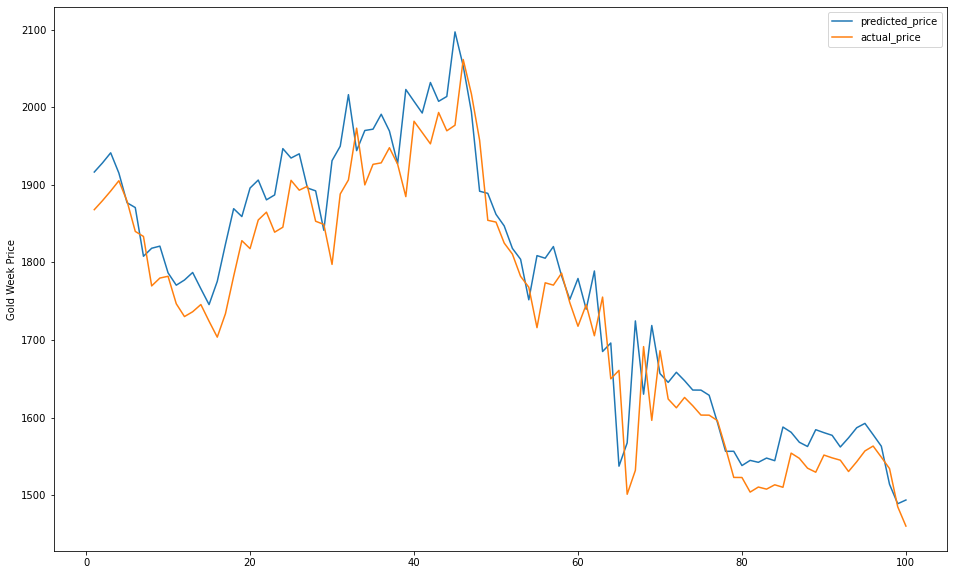

RMSE: 3014.58561493673


In [170]:
lsvmr = LinearSVR(epsilon = final_epsilon, C = final_C, max_iter = 10000).fit(X_train, y_train)
predicted_price = lsvmr.predict(X_test)
d = {'actual_price': y_test,'predicted_price': predicted_price}
df = pd.DataFrame(data=d)
df['actual_var'] = df.actual_price.shift(-1) - df.actual_price
df['actual_var_sign'] = np.sign(df.actual_var)
df['predicted_var'] = df.predicted_price.shift(1) - df.predicted_price
df['predicted_var_sign'] = df.predicted_var/abs(df.predicted_var)
df['correct_prediction'] = np.equal(df.actual_var_sign, df.predicted_var_sign)
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(16, 10))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold Week Price")
plt.show()

rmse = mean_squared_error(y_test, predicted_price)
print("RMSE:", rmse)

In [171]:
df.head(30)
print("Número de linhas: {}".format(df.shape[0]))

Número de linhas: 100


In [172]:
r2_score = lsvmr.score(X_test, y_test)*100
float("{0:.2f}".format(r2_score))

87.87

In [173]:
res = df.query('correct_prediction == True')
acertos = res.shape[0]
print("Acertos: {}".format(acertos))

Acertos: 48


## RBF SVM Regressor

In [174]:
epsilon_list = [0.1, 0.3]
C_list = 2**(np.random.uniform(-5, 15, 10))
gamma_list = 2**(np.random.uniform(-9, 3, 10))
final_r2 = np.NINF
for C_value in C_list:
    epsilon_value = random.choice(epsilon_list)
    gamma_value = random.choice(gamma_list)
    svr = SVR(gamma = gamma_value, epsilon = epsilon_value, C = C_value, kernel='rbf').fit(X_train, y_train)
    predicted_price = svr.predict(X_test)
    r2_score = svr.score(X_test, y_test)    
    if r2_score > final_r2:
        final_r2 = r2_score
        final_epsilon = epsilon_value
        final_C = C_value
        final_gamma = gamma_value
        final_coef0 = lsvmr.coef_[0]
        final_coef1 = lsvmr.coef_[1]
        final_coef2 = lsvmr.coef_[2]
        final_coef3 = lsvmr.coef_[3]
        final_intercept = lsvmr.intercept_
print("Resultado da busca por hiperparâmetros:")
print("Melhor R2 = {}".format(final_r2))
print("Valor do epsilon = {}".format(final_epsilon))
print("Valor do C = {}".format(final_C))
print("Valor do gamma = {}".format(final_gamma))
print("RBF SVM Regressor model")
print("Gold Week Price (y) = %.2f * Delta (x1) \
+ %.2f * 3 Days Moving Average (x2) \
+ %.2f * 5 Days Moving Average (x3) \
+ %.2f * 7 Days Moving Average (x4) \
+ %.2f (constant)" % (final_coef0, final_coef1, final_coef2, final_coef3, final_intercept))

Resultado da busca por hiperparâmetros:
Melhor R2 = -14.480041669299116
Valor do epsilon = 0.1
Valor do C = 23.716301534540044
Valor do gamma = 0.46381336607542406
RBF SVM Regressor model
Gold Week Price (y) = 0.99 * Delta (x1) + -0.01 * 3 Days Moving Average (x2) + 0.06 * 5 Days Moving Average (x3) + -0.01 * 7 Days Moving Average (x4) + 1.19 (constant)


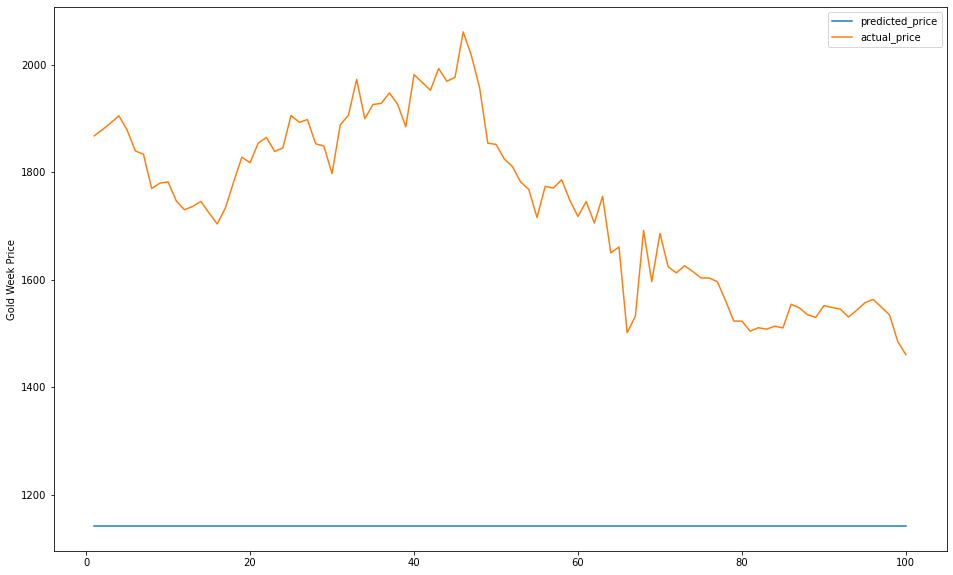

RMSE: 384806.1876774723


In [175]:
svr = SVR(gamma = final_gamma, epsilon = final_epsilon, C = final_C, kernel='rbf').fit(X_train, y_train)
predicted_price = svr.predict(X_test)
d = {'actual_price': y_test,'predicted_price': predicted_price}
df = pd.DataFrame(data=d)
df['actual_var'] = df.actual_price.shift(-1) - df.actual_price
df['actual_var_sign'] = np.sign(df.actual_var)
df['predicted_var'] = df.predicted_price.shift(1) - df.predicted_price
df['predicted_var_sign'] = df.predicted_var/abs(df.predicted_var)
df['correct_prediction'] = np.equal(df.actual_var_sign, df.predicted_var_sign)
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(16, 10))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold Week Price")
plt.show()

rmse = mean_squared_error(y_test, predicted_price)
print("RMSE:", rmse)

In [176]:
df.head(30)
print("Número de linhas: {}".format(df.shape[0]))

Número de linhas: 100


In [177]:
r2_score = svr.score(X_test, y_test)*100
float("{0:.2f}".format(r2_score))

-1448.0

In [178]:
res = df.query('correct_prediction == True')
acertos = res.shape[0]
print("Acertos: {}".format(acertos))

Acertos: 0


# Sem delta

In [42]:
X_test = gold.filter(['m3','m5','m7'],axis=1).tail(100)
print('Conjunto X de teste')
print("Número de linhas: {}\nNúmero de colunas: {}".format(X_test.shape[0], X_test.shape[1]))
X_test.head()

Conjunto X de teste
Número de linhas: 100
Número de colunas: 3


,m3,m5,m7
100,1451.000000,1446.50,1427.985714
99,1458.933333,1452.04,1439.200000
98,1470.400000,1459.74,1454.028571
97,1493.400000,1479.32,1468.571429
96,1523.000000,1498.98,1483.200000


In [43]:
X_train = gold.filter(['m3','m5','m7'],axis=1).head(-100)
print('Conjunto X de treino')
print("Número de linhas: {}\nNúmero de colunas: {}".format(X_train.shape[0], X_train.shape[1]))
X_train.head()

Conjunto X de treino
Número de linhas: 987
Número de colunas: 3


,m3,m5,m7
1087,274.833333,276.46,278.085714
1086,275.333333,275.26,276.785714
1085,275.966667,275.12,276.200000
1084,274.800000,275.26,275.228571
1083,274.200000,274.70,274.457143


## Linear Regressor

In [44]:
cross_val = cross_validate(
    LinearRegression(),
    X_train,
    y_train,
    scoring=('neg_root_mean_squared_error')
)
rmse_medio =  np.sqrt(np.mean(np.absolute(cross_val['test_score'])))
print("RMSE = {}".format(rmse_medio))

RMSE = 5.288362312578554


In [45]:
linear = LinearRegression().fit(X_train, y_train)
print("Linear Regression model")
print("Gold Week Price (y) = %.2f * 3 Days Moving Average (x1) \
+ %.2f * 5 Days Moving Average (x2) \
+ %.2f * 7 Days Moving Average (x3) \
+ %.2f (constant)" % (linear.coef_[0], linear.coef_[1], linear.coef_[2], linear.intercept_))

Linear Regression model
Gold Week Price (y) = 1.75 * 3 Days Moving Average (x1) + -1.14 * 5 Days Moving Average (x2) + 0.39 * 7 Days Moving Average (x3) + 4.58 (constant)


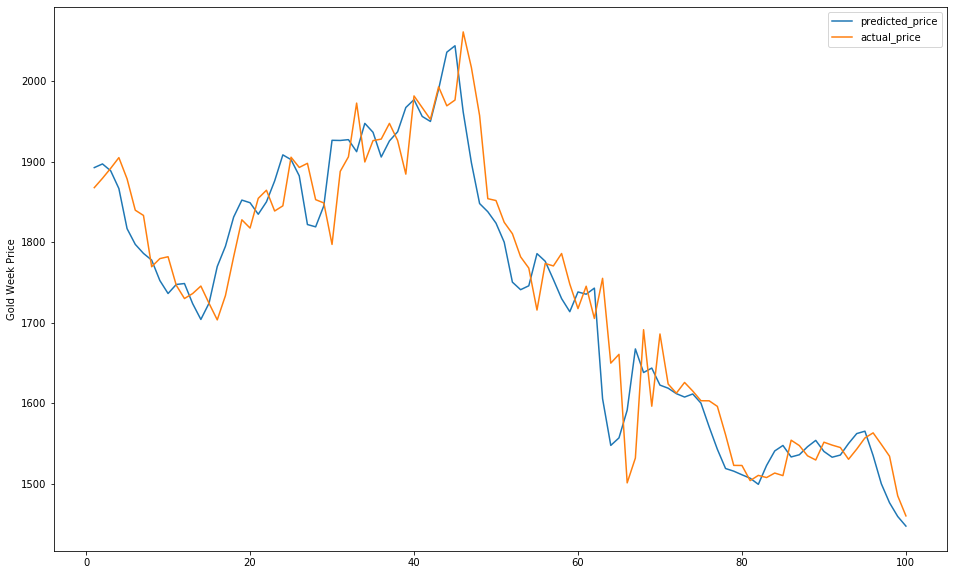

In [46]:
predicted_price = linear.predict(X_test)
d = {'actual_price': y_test,'predicted_price': predicted_price}
df = pd.DataFrame(data=d)
df['actual_var'] = df.actual_price.shift(-1) - df.actual_price
df['actual_var_sign'] = np.sign(df.actual_var)
df['predicted_var'] = df.predicted_price.shift(1) - df.predicted_price
df['predicted_var_sign'] = df.predicted_var/abs(df.predicted_var)
df['correct_prediction'] = np.equal(df.actual_var_sign, df.predicted_var_sign)
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(16, 10))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold Week Price")
plt.show()

In [47]:
df.head(30)
print("Número de linhas: {}".format(df.shape[0]))

Número de linhas: 100


In [48]:
r2_score = linear.score(X_test, y_test)*100
float("{0:.2f}".format(r2_score))

90.55

In [49]:
res = df.query('correct_prediction == True')
acertos = res.shape[0]
print("Acertos: {}".format(acertos))

Acertos: 43


In [50]:
alpha_list = 10**(np.random.uniform(-3, 3, 50))
final_r2 = np.NINF
for alpha_value in alpha_list:
    ridge = Ridge(alpha=alpha_value).fit(X_train, y_train)
    predicted_price = ridge.predict(X_test)
    r2_score = ridge.score(X_test, y_test)
    if r2_score > final_r2:
        final_r2 = r2_score
        final_alpha = alpha_value
        final_coef0 = ridge.coef_[0]
        final_coef1 = ridge.coef_[1]
        final_coef2 = ridge.coef_[2]
        final_coef3 = ridge.coef_[3]
        final_intercept = ridge.intercept_
print("Resultado da busca por hiperparâmetros:")
print("Melhor R2 = {}".format(final_r2))
print("Melhor alpha = {}".format(final_alpha))
print("Linear Regression model with Ridge (l2) regularization")
print("Gold Week Price (y) = %.2f * Delta (x1) \
+ %.2f * 3 Days Moving Average (x2) \
+ %.2f * 5 Days Moving Average (x3) \
+ %.2f * 7 Days Moving Average (x4) \
+ %.2f (constant)" % (final_coef0, final_coef1, final_coef2, final_coef3, final_intercept))

IndexError: index 3 is out of bounds for axis 0 with size 3

In [ ]:
ridge = Ridge(alpha=final_alpha).fit(X_train, y_train)
predicted_price = ridge.predict(X_test)
d = {'actual_price': y_test,'predicted_price': predicted_price}
df = pd.DataFrame(data=d)
df['actual_var'] = df.actual_price.shift(1) - df.actual_price
df['actual_var_sign'] = np.sign(df.actual_var)
df['predicted_var'] = df.predicted_price.shift(1) - df.predicted_price
df['predicted_var_sign'] = df.predicted_var/abs(df.predicted_var)
df['correct_prediction'] = np.equal(df.actual_var_sign, df.predicted_var_sign)
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(16, 10))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold Week Price")
plt.show()
rmse = mean_squared_error(y_test, predicted_price)
print("RMSE:", rmse)